## *Tarea #1*
## Daniel Behar y Cruz del Cid

# Dataset Tips

## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Read data

In [3]:
df = sns.load_dataset('datasets/tips')       # importar el conjunto de datos

In [4]:
df.shape

(244, 7)

##### Tamaño del data set Tips: 244 observaciones y 7 variables

## DataFrame exploration

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


- Total_bill: total de la cuenta (variable numerica continua)
- Tip: cantidad de propina que recibió el mesero (variable numerica continua)
- Sex: sexo del que pagó la cuenta (variable categorica)
- Smoker: si alguno de los de la mesa fumaba o no (variable categorica)
- Day: dia de la semana (variable categorica)
- Time: time of the day (variable categorica)
- Size: cantidad de personas en la mesa (variable numerica discreta)

#### Datos Faltantes

In [7]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
np.unique(df['day'])

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

#### Estadisticos de variables numericas

In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Correlacion de variables

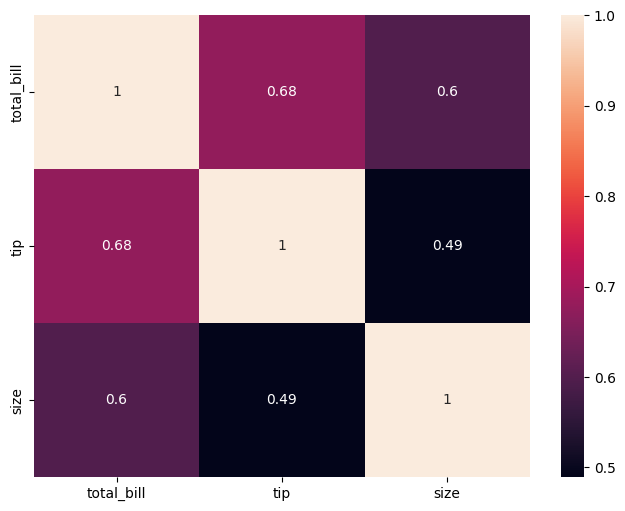

In [10]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## Exploratory data analysis (EDA)

## Histogramas

#### Histogramas de variables categoricas

In [11]:
df_cat = df[['sex', 'smoker', 'day', 'time']]
df_num = df[['total_bill', 'tip', 'size']]
df_num.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


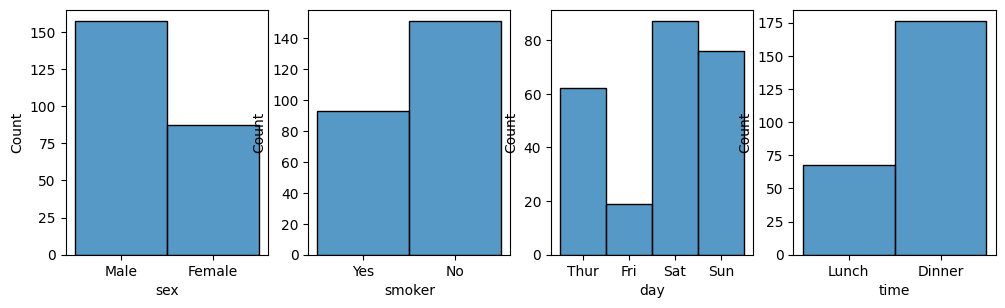

In [12]:
rows = 2
cols = 4
maxx = 4

plt.figure(figsize=(12,7))
for i in range(0, rows):
    for j in range(0, cols):
        if i*cols+j < maxx:
            plt.subplot(rows, cols, i*cols+j+1)
            sns.histplot(data=df_cat, x=df_cat.columns[i*cols+j])
plt.show()

- Se cree que más hombres que mujeres han dado propina.
- Más personas no fuman, ya sea el que pagó o alguien más del grupo.
- Solo se trabaja de jueves a domingo. Los viernes hay pocas propinas y la mayor cantidad son sabado.
- La mayoria de las personas dan propina en la cena.

#### Histogramas y funciones de densidad para las variables numericas

array([[<AxesSubplot: title={'center': 'total_bill'}>,
        <AxesSubplot: title={'center': 'tip'}>],
       [<AxesSubplot: title={'center': 'size'}>, <AxesSubplot: >]],
      dtype=object)

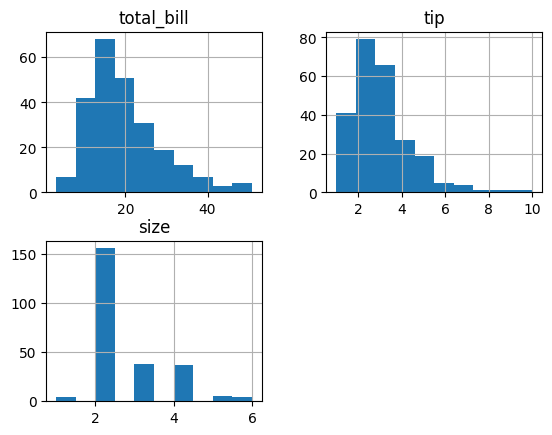

In [13]:
df.hist()

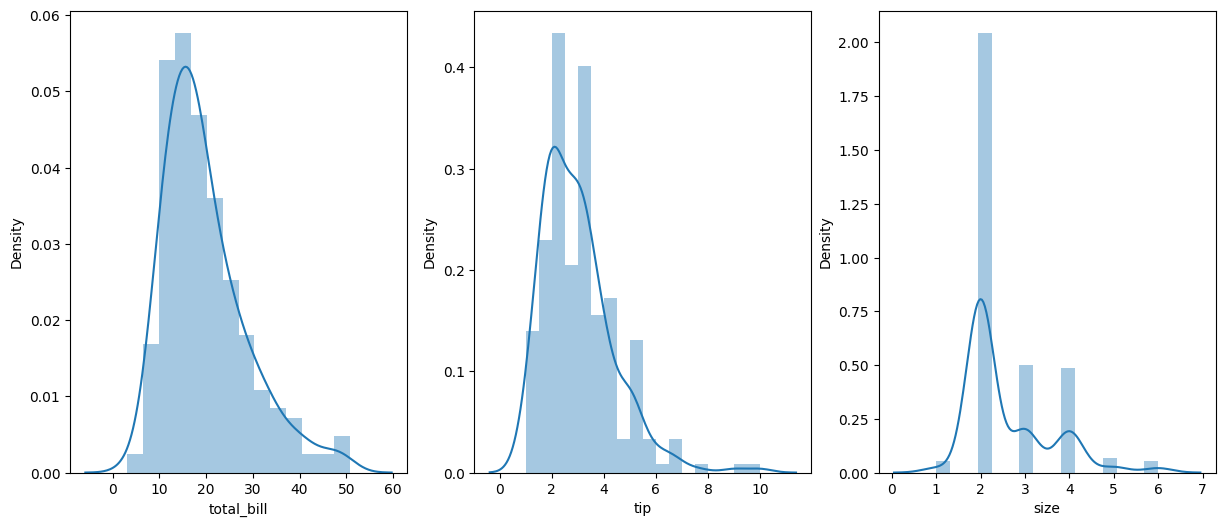

In [14]:
plt.figure(figsize=(20,6))
for i in range(0, 3):
    plt.subplot(1,4,i+1)
    sns.distplot(df_num[df_num.columns[0+i]], kde='True')
plt.show()

<Figure size 2000x600 with 0 Axes>

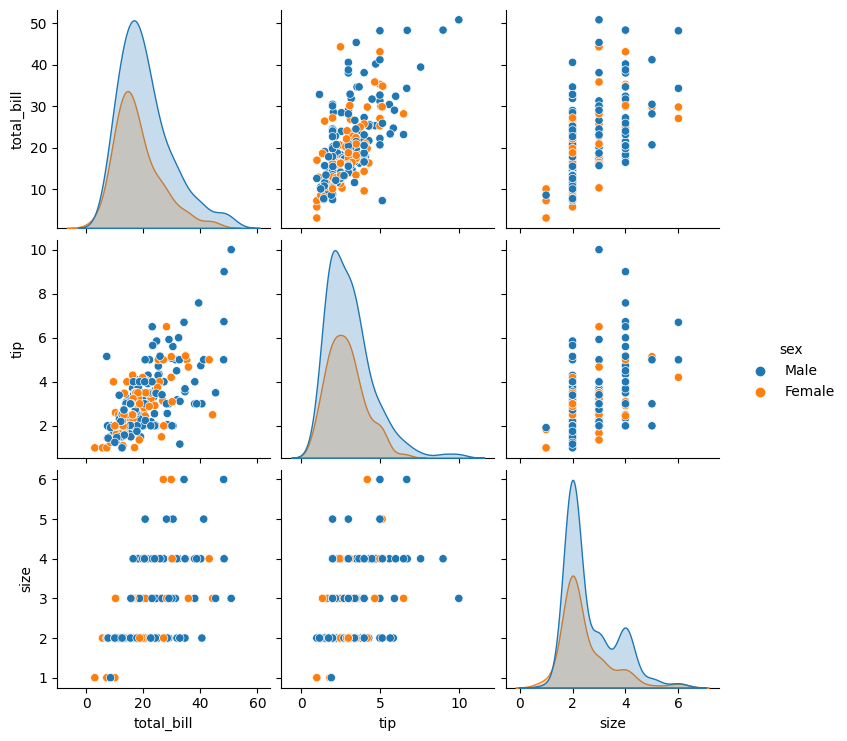

In [26]:
plt.figure(figsize=(20,6))
sns.pairplot(data=df, diag_kind='kde', hue='sex')
plt.show()

- La mayoria de los pagos los hacen los hombres pero cuando pagan las mujeres, pagan en la misma proporcion (los hombres tienden a pagar las cuentas mas altas)
- La tendecia es que vayan 2 personas, pero la mayor cantidad de datos se concentran entre 2 y 4. Es raro que vaya alguien solo

<Figure size 2000x600 with 0 Axes>

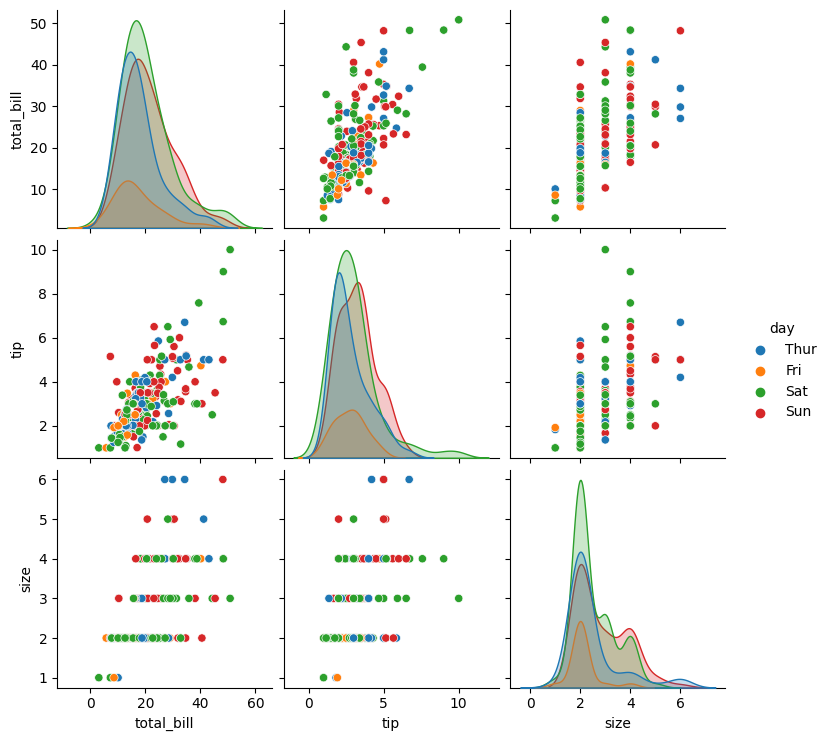

In [16]:
plt.figure(figsize=(20,6))
sns.pairplot(data=df, diag_kind='kde', hue='day')
plt.show()

- El sabado es el mejor dia, ya que mas personas llegan a consumir y dan mas propinas, en contraste con el viernes que es bastante bajo
- El viernes se puede precindir de personal, ya que es un dia de bajas visitas (con una subida leve de personal los sabados)

#### Relaciones entre variables numericas y categoricas

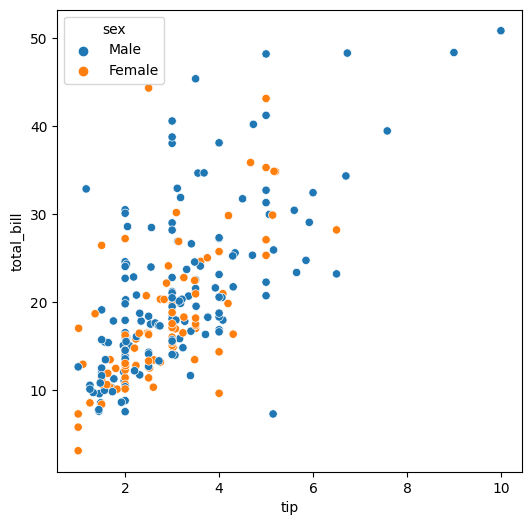

In [30]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='tip', y='total_bill', 
    hue='sex')
plt.show()

## Densidades 2D

<Figure size 1500x600 with 0 Axes>

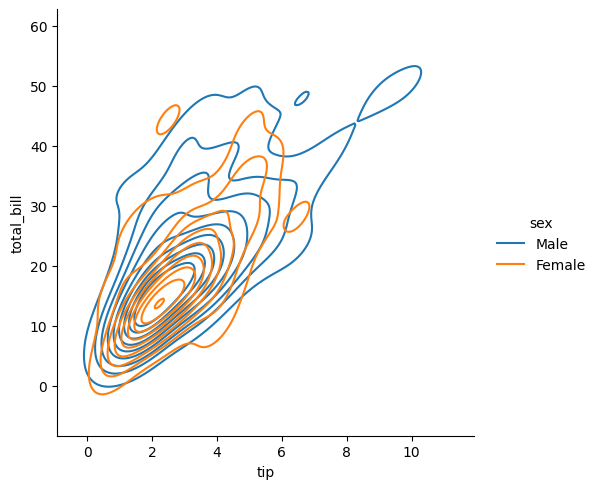

In [32]:
plt.figure(figsize=(15,6))
sns.displot(data=df, x='tip', y='total_bill', kind='kde', hue='sex')
plt.show()

Las tendencias son identicas, pero los hombres pagan mas cuentas, dan mas propinas y pagan las mas caras

<Figure size 1500x600 with 0 Axes>

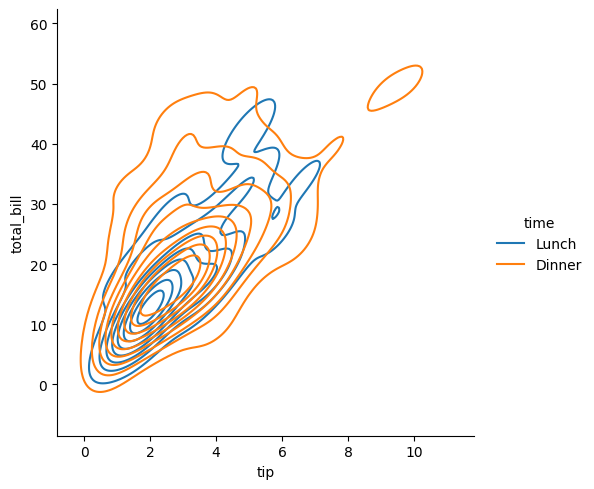

In [34]:
plt.figure(figsize=(15,6))
sns.displot(data=df, x='tip', y='total_bill', kind='kde', hue='time')
plt.show()

La media de pagos en la noche es mas alta y mas grande que la media de pagos en el almuerzo

<Figure size 1500x600 with 0 Axes>

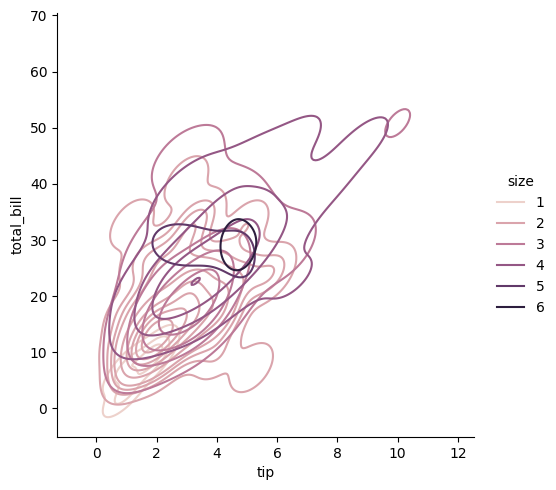

In [35]:
plt.figure(figsize=(15,6))
sns.displot(data=df, x='tip', y='total_bill', kind='kde', hue='size')
plt.show()

Las medias de los grupos de personas mas grandes tienden a ser las medias de pagos y propinas mas grandes, y mientras mas grande el grupo, mas concentrado esta ya que no hay muchas observaciones de grupos grandes

<Figure size 1500x600 with 0 Axes>

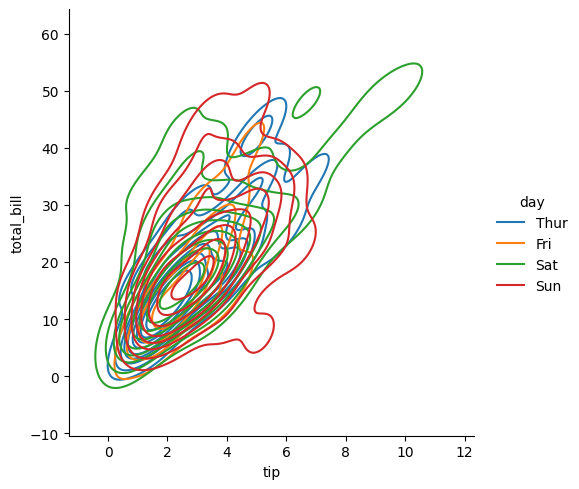

In [36]:
plt.figure(figsize=(15,6))
sns.displot(data=df, x='tip', y='total_bill', kind='kde', hue='day')
plt.show()

- A pesar de que el viernes las ventas son menores, estas si tienen congruencia con la tendencia general y se amolda a los otros dias
- Las medias de cada dia se parecen bastante entre si